# Categorical Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult.data', header=None, index_col=False,
                  names=['age', 'workclass', 'fnlwgt', 'education', 
                         'education-num', 'marital-status', 'occupation', 
                         'relationship', 'race', 'gender', 'capital-gain', 
                         'capital-loss', 'hours-per-week', 'native-country', 'income'])

The data given here has no column names so we need to add them manually

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.shape

(32561, 15)

### One-Hot-Encoding (Dummy Variables)

In [5]:
print('Original features:\n', list(data.columns), '\n')
data_dummies = pd.get_dummies(data)
print('Features after get_dummies:\n', list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'] 

Features after get_dummies:
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-sta

The continuous features like `age`, `education-num`, `capital-gain`, `capital-loss` and `hours-per-week` were not changed but all the categorical features were expanded into one new feature for each possible value

In [6]:
data_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
features = data_dummies.loc[:, 'age':'native-country_ Yugoslavia']

# extract numpy array
X = features.values
y = data_dummies['income_ >50K'].values

print('X.Shape: {} y.shape {}'.format(X.shape, y.shape))

X.Shape: (32561, 108) y.shape (32561,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [9]:
print('Test Score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test Score: 0.80


### Numbers can Encode Categorical

In [10]:
# create DataFramw with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0,1,2,1],
                       'Categorical Feature': ['socks', 'fox', 'socks', 'box']})

display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [11]:
pd.get_dummies(demo_df) # will only encode the string feature and not change the integer feature

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [12]:
# if you want dummy variables to be created for the 'Integer Feature' column, 
# you can explicitly list the columns you want to encode using columns parameter.
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)

In [13]:
pd.get_dummies(demo_df, columns = ['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


# Binning, Discretizing, Linear Models, and Trees

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn

In [15]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

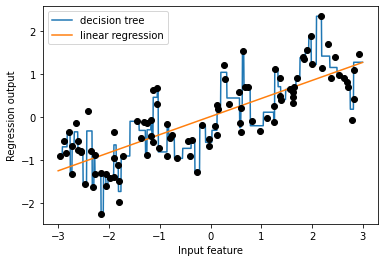

In [16]:
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [17]:
bins = np.linspace(-3, 3, 11) # define the bins
print('bins: {}'.format(bins)) 

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [18]:
which_bin = np.digitize(X, bins=bins) # to know in which bin a data point falls into
print('\nData Points:\n', X[:5])
print('\nBin membership for data points:\n', which_bin[:5])


Data Points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


We transform the single continuous input feature into a categorical feature.  
Now we will apply `OneHotEncoder` that does the same thing as `pandas.get_dummies`, though it currently works on categorical variables that are integers

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
encoder = OneHotEncoder(sparse=False) # transform using the OneHotEncoder
encoder.fit(which_bin) # finds the unique values that appear in which_bin
X_binned = encoder.transform(which_bin) # transform creates the one-hot encoding

In [21]:
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Because we specified 10 bins, the transformed dataset X_binned now is made of 10 features

Text(0.5, 0, 'Input feature')

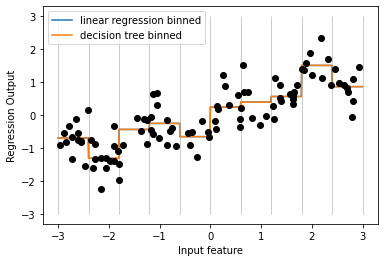

In [22]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=0.2)
plt.legend(loc='best')
plt.ylabel('Regression Output')
plt.xlabel('Input feature')

Linear Models became much flexible because it now has a different value for each bin, while Decision tree model got much less flexible. Therefore Binning has no beneficial effect on decision trees but can be used to increase modeling power in linear models.

# Interactions and Polynomials

In [23]:
X_combined =  np.hstack([X, X_binned])  # Stack arrays in sequence horizontally (column wise).
print(X_combined.shape)

(100, 11)


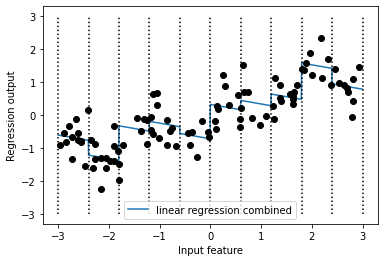

In [24]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:, 0], y, 'o', c='k')

In [25]:
X_product = np.hstack([X_binned, X * X_binned]) # indicator for which bin a datapoint is in and a product of original feature and the bin indicator
X_product.shape

(100, 20)

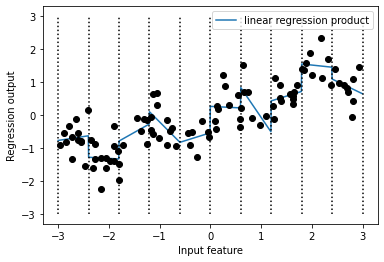

In [26]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:, 0], y, 'o', c='k')

Now each bin has its own offset and slope in this model.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials upto x ** 10
# default 'include_bias=True' adds a feature that's constantly 1

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)

In [28]:
X_poly.shape

(100, 10)

In [29]:
# compare X_poly to X
print('Entries of X:\n{}'.format(X[:5]))
print('Entries of X_poly:\n{}'.format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [30]:
print('Polynomial feature names:\n{}'.format(poly.get_feature_names())) # obtain semantics of the features

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


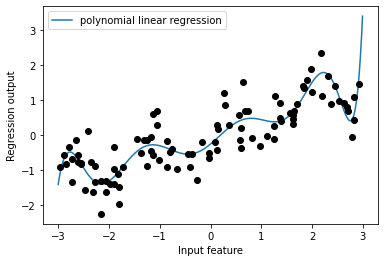

In [31]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:, 0], y, 'o', c='k')

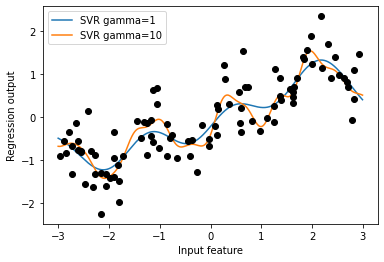

In [32]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:, 0], y, 'o', c='k')

In [33]:
# Let's try this on Boston House Price dataset

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [35]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_train_poly Shape: {}'.format(X_train_poly.shape))

X_train Shape: (379, 13)
X_train_poly Shape: (379, 105)


The data originally had 13 features which are expanded into 105 interaction features.

In [36]:
print('Polynomial feature names:\n{}'.format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


The new feature is a constant feature, called '1'. The next 13 features are original features (called 'x0' to 'x12').

In [37]:
# Let's also compare the performance using Ridge on the data with and without interactions:

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print('Score with out interactions:{:.3f}'.format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print('Score with out interactions:{:.3f}'.format(ridge.score(X_test_poly, y_test)))

Score with out interactions:0.621
Score with out interactions:0.753


Clearly, the interactions and polynomial features gives good boost in performance using Ridge

In [38]:
# Let's also compare the performance using RandomForestRegressor on the data with and without interactions:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print('Score with out interactions:{:.3f}'.format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print('Score with out interactions:{:.3f}'.format(rf.score(X_test_poly, y_test)))

Score with out interactions:0.804
Score with out interactions:0.771


Here, without even additional features, the random forest beats the performance of Ridge. Adding interactions and Polynomials actually decreases the performance slightly.

# Univariate Nonlinear Transformations

In [39]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

In [40]:
print('Number of feature appearances:\n{}'.format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


2 seem to be most common with 62 appearances and the counts for higher values falls quickly.

Text(0.5, 0, 'Value')

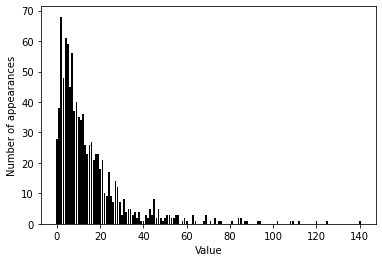

In [41]:
# visualize the counts

bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='k')
plt.ylabel('Number of appearances')
plt.xlabel('Value')

This kind of distribution is also known as Poisson distribution, which is quite fundamental to count data. However, it is something most linear models can't handle very well.

In [42]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.622


So from relatively low R^2 Score, we can see that Ridge was unable to capture the relationship between X and y. Applying a logarithmic transformation can help.  
Also, as 0 appears in data and we can not actually applo log to it so we have to compute log(X+1)

In [43]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

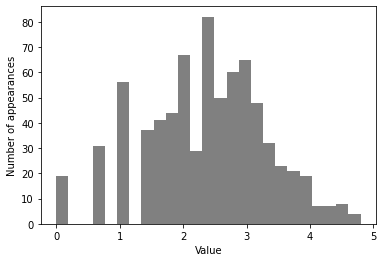

In [44]:
plt.hist(X_train_log[:, 0], bins=25, color='grey')
plt.ylabel('Number of appearances')
plt.xlabel('Value')

After transformation, distribution of data is less asymmetrical and doesn't have very large outliers.

In [45]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test Score: {:.3f}'.format(score))

Test Score: 0.875


In this example all the features had same properties which is rarely the case in practice, and usually only a subset of the features should be transformed, or sometimes each feature needs to be transformed in a different way.

# Automatic Feature Selection
When adding new features, or with high-dimensional datasets in general, there is a chance of oeverfitting, and it might be a good idea to reduce the number of features to only the most useful ones, and discard the rest.  
Three basic strategies:
* Univariate Statistics
* Model-based Selection
* Iterative Selection  

### Univariate Statistics
* if there is statistically significant relationship between each feature and the target, if yes then the features with high confidence are selected. Analysis of Variance (ANOVA)
* Only consider each feature individually, feature will be discarded if it is only informative when combined with another feature.
* Fast to compute, don't require building a model.
* to use it, choose - `f_classif` for classification (default), `f_regression` for regression, a method to discard feature on p-values determined in test.
* this method to discard parameters use a threshold to discard all features with too high p-value.
* `SelectKBest` which selects a fixed number k of features, and `SelectPercentile` which selects a fixed percentage of features.

In [46]:
# Let's apply this on for classification on cancer dataset

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# add noise feature to the data
X_w_noise = np.hstack([cancer.data, noise]) # first 30 features are from dataset and next 50 are noise

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, 
                                                    random_state=0, test_size=0.5)

# use f_classif and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], <a list of 0 Text major ticklabel objects>)

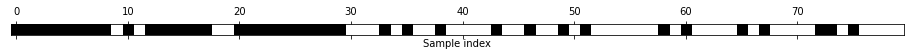

In [47]:
# get_support method to see which features get selected

mask = select.get_support()
print(mask)

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')
plt.yticks(())

We can see that most of the selected features are original features and most of the noise features are removed.
Let's now compare the performance of selected features and all features.

In [48]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()

lr.fit(X_train, y_train)
print('Score with all features: {:.3f}'.format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('Score with selected features: {:.3f}'.format(lr.score(X_test_selected, y_test)))

Score with all features: 0.919
Score with selected features: 0.912


C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### Model- based Feature Selection

In [49]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                         threshold='median')

In [50]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

print('X train Shape: {}'.format(X_train.shape))
print('X_train_l1_shape: {}'.format(X_train_l1.shape))

X train Shape: (284, 80)
X_train_l1_shape: (284, 40)


([], <a list of 0 Text major ticklabel objects>)

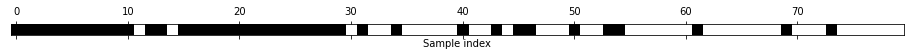

In [51]:
mask = select.get_support()

# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')
plt.yticks(())

In [52]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=1000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.954


C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Iterative Feature Selection

([], <a list of 0 Text major ticklabel objects>)

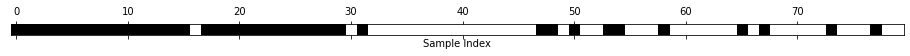

In [53]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
            n_features_to_select=40)

select.fit(X_train, y_train)

# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.yticks(())

In [54]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=1000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test Score: {:.3f}'.format(score))

Test Score: 0.954


C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print('Test score: {:.3f}'.format(select.score(X_test, y_test)))

Test score: 0.951


# Utilizing Expert Knowledge

In [56]:
citibike = mglearn.datasets.load_citibike()

citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

Text(0, 0.5, 'Rentals')

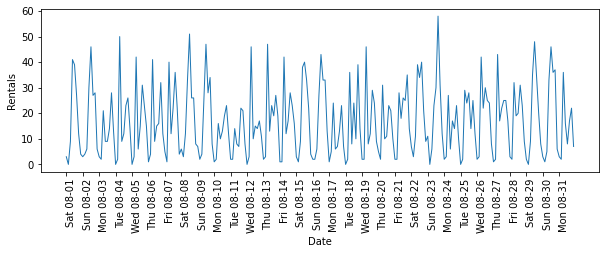

In [57]:
# rental frequencies for whole month

plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(),
                      end=citibike.index.max(),
                      freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"),
          rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rentals')

In [58]:
# extract the target values (number of rentals)    
y = citibike.values

# convert to POSIX time by dividing by 10**9
X = citibike.index.astype('int64').values.reshape(-1, 1) // 10**9

In [59]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    
    # split the given features into a training and test set
    X_train, X_test = features[:n_train], features[n_train:]
    
    # split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print('Test Set R^2: {:.2f}'.format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10,3))
    plt.xticks(range(0, len(X), 8), 
               xticks.strftime('%a %m-%d'), 
               rotation=90, 
               ha='left')
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    plt.plot(range(n_train), y_pred_train, '--', label='prediction train')
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='prediction test')
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel('Date')
    plt.ylabel('Rentals')

Test Set R^2: -0.04


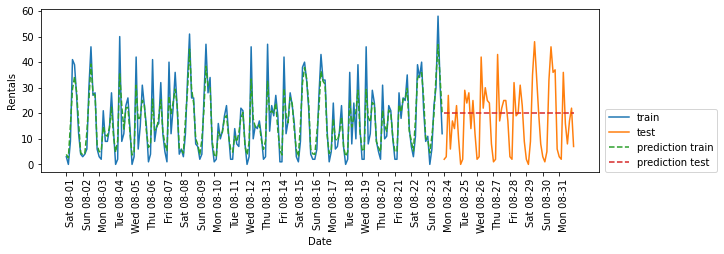

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

eval_on_features(X, y, regressor)

Test Set R^2: 0.60


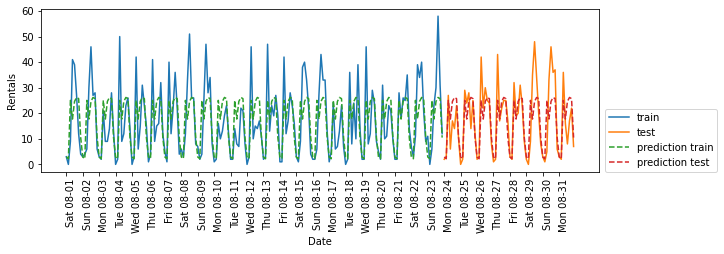

In [61]:
X_hour = citibike.index.hour.values.reshape(-1, 1)

eval_on_features(X_hour, y , regressor)

Test Set R^2: 0.84


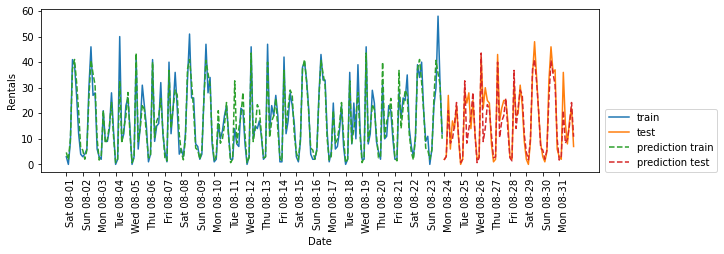

In [62]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])

eval_on_features(X_hour_week, y, regressor)

Test Set R^2: 0.13


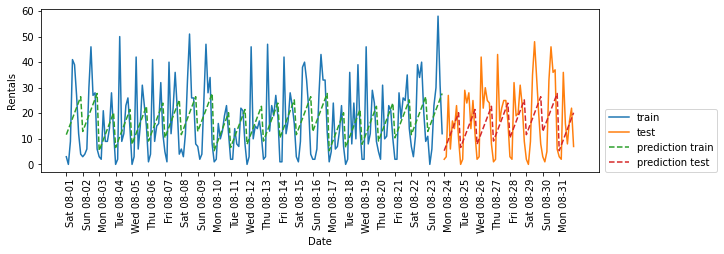

In [63]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

Test Set R^2: 0.62


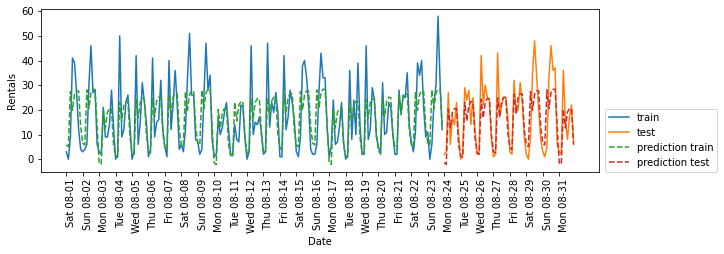

In [64]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

Test Set R^2: 0.85


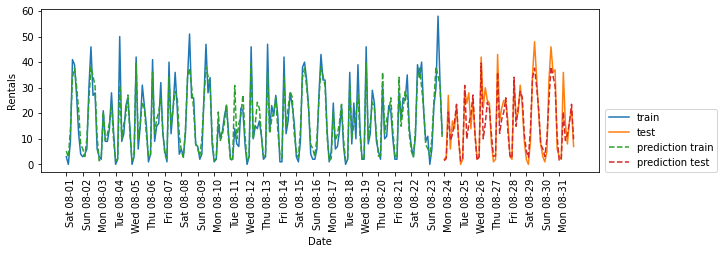

In [65]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                     include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)

lr=Ridge()
eval_on_features(X_hour_week_onehot_poly, y , lr)

In [66]:
hour = ['%02d:00' % i for i in range(0,24,3)]
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
features = day + hour

Text(0, 0.5, 'Feature magnitude')

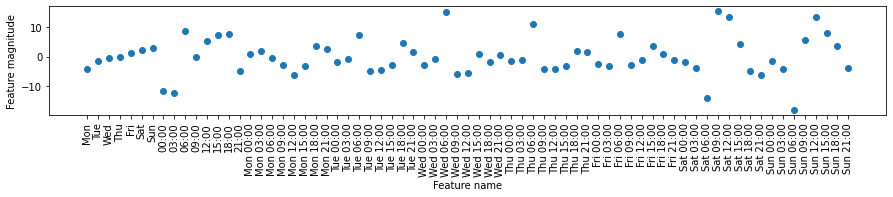

In [67]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")